In [7]:
import pandas as pd
import numpy as np

results = pd.read_csv(r"C:\Users\stoughth\Documents\mama-mia\transformerResults\SpatioTemporalNoSkips\outputsNov24-AddPoolAllLossesBestSeg\scores.csv")

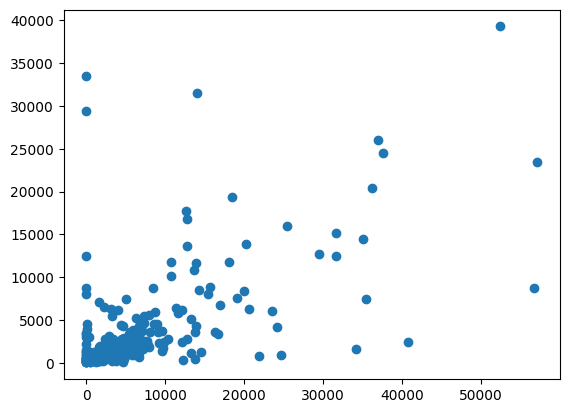

In [2]:
import matplotlib.pyplot as plt
predPos = results["TP (Seg)"] + results["FP (Seg)"]
realPos = results["TP (Seg)"] + results["FN (Seg)"]
plt.scatter(predPos, realPos)

c:\Users\stoughth\Documents\mama-mia\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


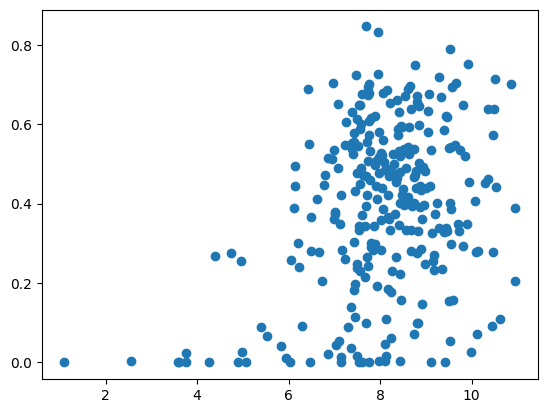

In [6]:
plt.scatter(np.log(predPos), results["Dice (Full Image)"])

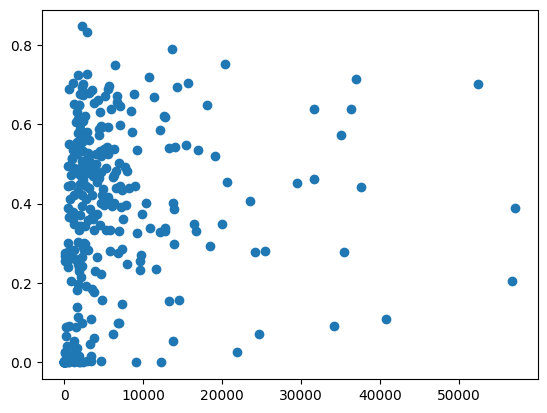

In [4]:
plt.scatter(predPos, results["Dice (Full Image)"])

In [7]:
results[predPos == predPos.max()]

,Patient ID,Dice (Full Image),Dice (Avg Over Patches),HD95,TP (Seg),FP (Seg),TN (Seg),FN (Seg),Sens (Seg),Spec (Seg),Acc (Seg),Prec (Seg),F1 (Seg),IoU (Seg),Bal Acc (Seg),NPV (Seg),FPR (Seg),FNR (Seg)
121,ispy2_597873,0.389495,0.412324,11.532563,15676,41412,356526,7730,0.669743,0.895934,0.883368,0.274594,0.389495,0.241846,0.782838,0.978779,0.104066,0.330257


(array([188.,  55.,  19.,  12.,   8.,   4.,   5.,   3.,   2.,   2.,   1.,
          1.,   1.,   1.,   1.,   0.,   1.,   1.,   0.,   1.]),
 array([3.700000e+01, 1.999550e+03, 3.962100e+03, 5.924650e+03,
        7.887200e+03, 9.849750e+03, 1.181230e+04, 1.377485e+04,
        1.573740e+04, 1.769995e+04, 1.966250e+04, 2.162505e+04,
        2.358760e+04, 2.555015e+04, 2.751270e+04, 2.947525e+04,
        3.143780e+04, 3.340035e+04, 3.536290e+04, 3.732545e+04,
        3.928800e+04]),
 <BarContainer object of 20 artists>)

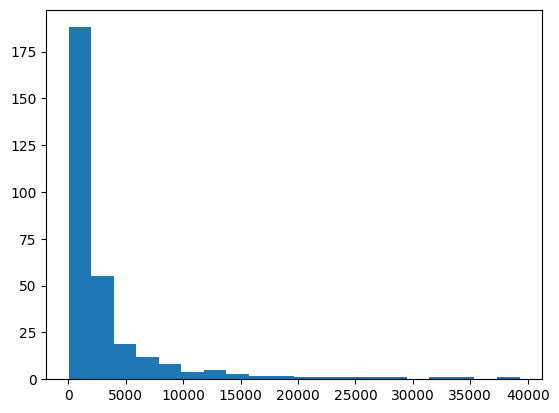

In [15]:
plt.hist(realPos, bins=20)

In [13]:
smallTumors = results[results["TP (Seg)"] + results["FN (Seg)"] < 200]
len(smallTumors)

15

## Image Size Checking

In [3]:
import zarr
import os

dataPathTr = r"my_preprocessed_data\Dataset106_cropped_Xch_breast_no_norm\training"
dataPathTs = r"my_preprocessed_data\Dataset106_cropped_Xch_breast_no_norm\testing"

In [5]:
x, y, z = [], [], []

for p in os.listdir(dataPathTr):
    if not p.endswith("zarr"):
        continue
    full = os.path.join(dataPathTr, p)
    img = zarr.open(full, mode='r')
    s = img.shape
    x.append(s[0])
    y.append(s[1])
    z.append(s[2])

for p in os.listdir(dataPathTs):
    if not p.endswith("zarr"):
        continue
    full = os.path.join(dataPathTs, p)
    img = zarr.open(full, mode='r')
    s = img.shape
    x.append(s[0])
    y.append(s[1])
    z.append(s[2])

In [8]:
x = np.array(x)
y = np.array(y)
z = np.array(z)

In [13]:
def summary(arr: np.ndarray):
    print(f"{arr.mean():.4f} +/- {arr.std():.4f} ({arr.min()}, {arr.max()})")

summary(x)
summary(y)
summary(z)

161.8707 +/- 17.3433 (71, 266)
187.2109 +/- 54.3624 (83, 364)
163.0525 +/- 25.9611 (78, 277)


In [ ]:
arg = np.argmax(x*y*z)
print(x[arg], y[arg], z[arg])


205 334 210


In [16]:
arg = np.argmin(x*y*z)
print(x[arg], y[arg], z[arg])


76 101 83


In [23]:
median = x*y*z
median.sort()
median = median[len(median) // 2]
print(median)
arg = np.where(x*y*z == median)
print(arg)

print("X Y Z:")
for a in arg[0]:
    print(x[a], y[a], z[a])

4384674
(array([3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 4713, 4714, 4715,
       4716, 4717, 4718, 4719, 4720, 5185, 5186, 5187, 5188, 5189, 5190,
       5191, 5192, 5752, 5753, 5754, 5755, 5756, 5757, 5758, 5759, 6272,
       6273, 6274, 6275, 6276, 6277, 6278, 6279, 6910, 6911, 6912, 6913,
       6914, 6915, 6916, 6917, 8126, 8127, 8128, 8129, 8130, 8131, 8132,
       8133]),)
X Y Z:
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153 161 178
153